# Census Income Data Set 

Abstract: Predict whether income exceeds $50K/yr based on census data. Also known as "Adult" dataset.

In [5]:
import pandas as pd
import numpy as np
from tqdm import tqdm_notebook
from matplotlib import pyplot as plt
from scipy import stats
%matplotlib inline

# Load the Data

In [6]:
col_names=['age',
            'workclass',
            'fnlwgt',
            'education',
            'education-num',
            'marital-status',
            'occupation',
            'relationship',
            'race',
            'sex',
            'capital-gain',
            'capital-loss',
            'hours-per-week',
            'native-country',
            'inc_class']


In [7]:
ds=pd.read_csv('adult.data', ',', names=col_names, index_col=False)
ds.head()

C:\Users\isa_a\AppData\Local\Temp\ipykernel_26676\41874643.py:1: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  ds=pd.read_csv('adult.data', ',', names=col_names, index_col=False)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,inc_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [8]:
ds.shape

(32561, 15)

In [42]:
ds['marital-status'].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

# Categorical features

In [9]:
import category_encoders as ce

In [10]:
ds.dtypes[ds.dtypes=='object'].index


Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country', 'inc_class'],
      dtype='object')

In [11]:
ce_bin = ce.BinaryEncoder(cols = list(ds.dtypes[ds.dtypes=='object'].index))
ce_bin.fit_transform(ds)

,age,workclass_0,workclass_1,workclass_2,workclass_3,fnlwgt,education_0,education_1,education_2,education_3,...,capital-loss,hours-per-week,native-country_0,native-country_1,native-country_2,native-country_3,native-country_4,native-country_5,inc_class_0,inc_class_1
0,39,0,0,0,1,77516,0,0,0,0,...,0,40,0,0,0,0,0,1,0,1
1,50,0,0,1,0,83311,0,0,0,0,...,0,13,0,0,0,0,0,1,0,1
2,38,0,0,1,1,215646,0,0,0,1,...,0,40,0,0,0,0,0,1,0,1
3,53,0,0,1,1,234721,0,0,0,1,...,0,40,0,0,0,0,0,1,0,1
4,28,0,0,1,1,338409,0,0,0,0,...,0,40,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,0,0,1,1,257302,0,0,1,1,...,0,38,0,0,0,0,0,1,0,1
32557,40,0,0,1,1,154374,0,0,0,1,...,0,40,0,0,0,0,0,1,1,0
32558,58,0,0,1,1,151910,0,0,0,1,...,0,40,0,0,0,0,0,1,0,1
32559,22,0,0,1,1,201490,0,0,0,1,...,0,20,0,0,0,0,0,1,0,1


# Algorithms

In [12]:
from sklearn.model_selection import train_test_split

#set x and y
#classification
ds_clf=ds.drop(['inc_class'], axis=1)
#binary encoding
ce_bin = ce.BinaryEncoder(cols = list(ds_clf.dtypes[ds_clf.dtypes=='object'].index))
ds_clf_bin_enc=ce_bin.fit_transform(ds_clf)
y_clf=[0 if ic==' <=50K' else 1 for ic in ds.inc_class]
#Train/test split
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(ds_clf_bin_enc, y_clf, test_size=0.33, random_state=42)


#regression
ds_reg = ds.drop(['age'], axis=1)
ce_bin = ce.BinaryEncoder(cols = list(ds_reg.dtypes[ds_reg.dtypes=='object'].index))
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(ce_bin.fit_transform(ds_reg), ds.age, test_size=0.33, random_state=42)


In [13]:
X_train_c.shape

(21815, 36)

## Dimensionality reduction

In [14]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

### PCA

In [15]:
pca = PCA(n_components=2)
x_pca_clf=pca.fit_transform(ds_clf_bin_enc)
X_train_c2D, X_test_c2D, y_train_c2D, y_test_c2D = train_test_split(x_pca_clf, y_clf, test_size=0.33, random_state=42)


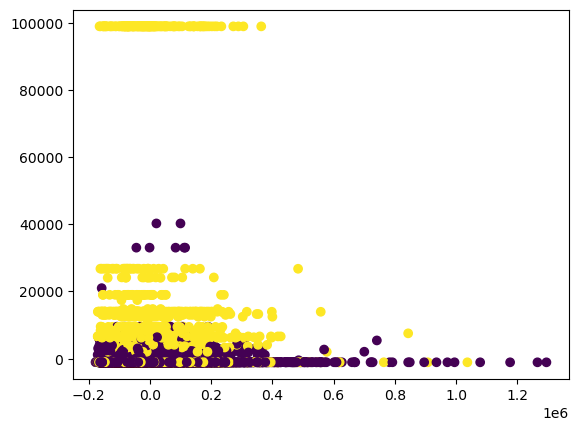

In [16]:
plt.scatter(x_pca_clf[:,0], x_pca_clf[:,1], c=y_clf)

### TSNE

In [19]:
tsne=TSNE(n_components=2)
x_tsne_clf=tsne.fit_transform(ds_clf_bin_enc)
X_train_c2D2, X_test_c2D2, y_train_c2D2, y_test_c2D2 = train_test_split(x_tsne_clf, y_clf, test_size=0.33, random_state=42)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


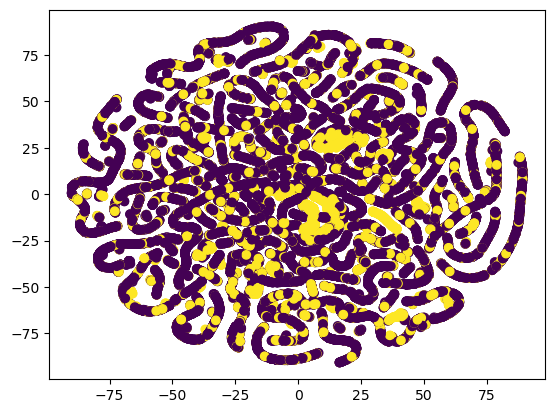

In [20]:
plt.scatter(x_tsne_clf[:,0], x_tsne_clf[:,1], c=y_clf)

# Clustering

In [23]:
from sklearn.cluster import KMeans, AgglomerativeClustering

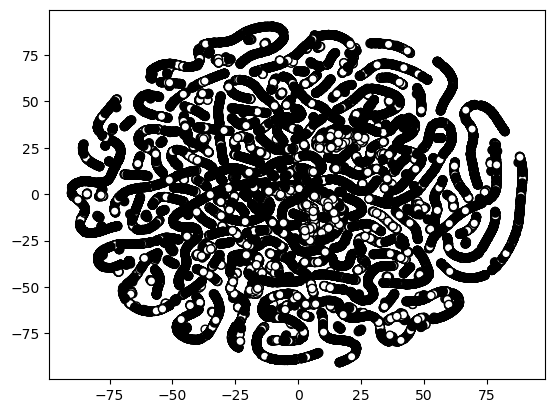

In [24]:
plt.scatter(x_tsne_clf[:,0], x_tsne_clf[:,1], edgecolor='black', c=y_clf, cmap='gray')

## K-means

In [25]:
clst=KMeans(n_clusters=5).fit(x_tsne_clf)

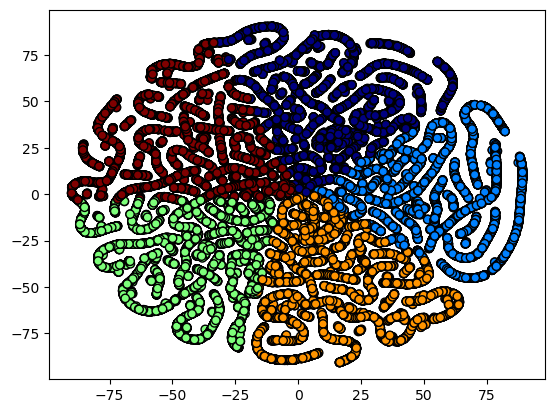

In [26]:
plt.scatter(x_tsne_clf[:,0], x_tsne_clf[:,1], edgecolor='black', c=clst.labels_, cmap='jet')

In [27]:
clst.labels_

array([1, 0, 0, ..., 3, 0, 2])

In [28]:
clst.cluster_centers_

array([[ 13.452388  ,  49.922638  ],
       [ 54.886627  ,   0.90409774],
       [-43.121506  , -34.424377  ],
       [ 16.022503  , -47.232594  ],
       [-43.654385  ,  28.102346  ]], dtype=float32)

In [29]:
daryn=np.array([[ 23.003283 ,  45.699173 ],
       [ 52.395187 ,  -7.5174   ],
       [-44.995434 , -20.133066 ],
       [-38.62873  ,  41.010876 ],
       [  7.7604003, -53.436024 ]])

daniyar=np.array([[-27.395172 , -43.460205 ],
       [ -1.3509645,  54.745056 ],
       [ 46.7869   ,  15.957848 ],
       [-50.77197  ,  14.290402 ],
       [ 34.526375 , -43.987835 ]])

azhar=np.array([[ 27.797762 ,  45.99722  ],
       [  3.0415657, -53.12648  ],
       [-50.01948  , -18.833288 ],
       [-32.272396 ,  39.364723 ],
       [ 50.3723   , -12.114204 ]])

asem=np.array([[-39.709908, -33.705173],
       [ 54.19239 ,   6.198991],
       [-46.485382,  28.100378],
       [ 20.27243 , -47.374187],
       [ 10.277529,  49.675636]])

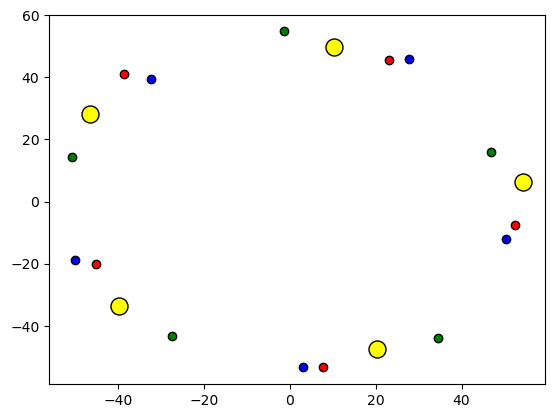

In [30]:
plt.scatter(daryn[:,0], daryn[:,1], edgecolor='black',  color='red')
plt.scatter(daniyar[:,0], daniyar[:,1], edgecolor='black', color='green')
plt.scatter(azhar[:,0], azhar[:,1], edgecolor='black', color='blue')
plt.scatter(asem[:,0], asem[:,1], edgecolor='black', color='yellow', s=150)

In [31]:
from sklearn.metrics.pairwise import pairwise_kernels
from sklearn.metrics import pairwise_distances

In [32]:
mx1=pairwise_distances(daryn, asem)

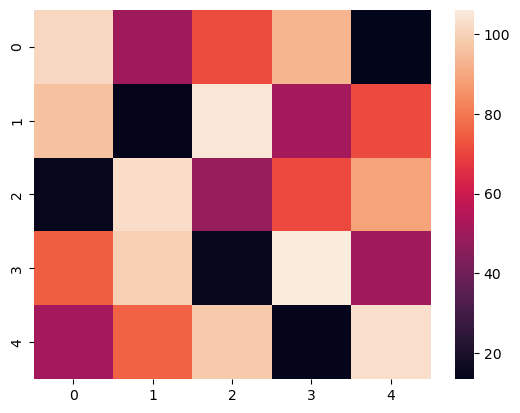

In [33]:
import seaborn as sns; #sns.set_theme()
ax = sns.heatmap(mx1)

In [26]:
mx1

array([[101.18297529,  50.32916424,  71.68257912,  93.11341418,
         13.33255688],
       [ 95.75566813,  13.83363006, 105.09991929,  51.19018448,
         71.02774445],
       [ 14.56498793, 102.6235921 ,  48.25645102,  70.72462615,
         89.0413124 ],
       [ 74.72387118,  99.13439189,  15.11317105, 106.2133043 ,
         49.66789944],
       [ 51.40755442,  75.57952554,  97.93257756,  13.90312033,
        103.14237909]])

In [27]:
mx2=pairwise_distances(daryn, azhar)

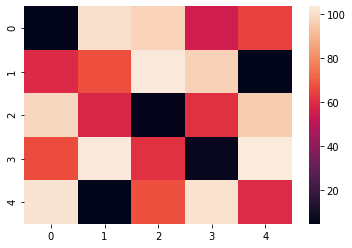

In [28]:
ax2 = sns.heatmap(mx2)

## Agglomerative

In [51]:
clst2=AgglomerativeClustering(n_clusters=5).fit(x_tsne_clf[:,:])#, distance_threshold=100 

In [35]:
print(clst2.n_clusters)

5


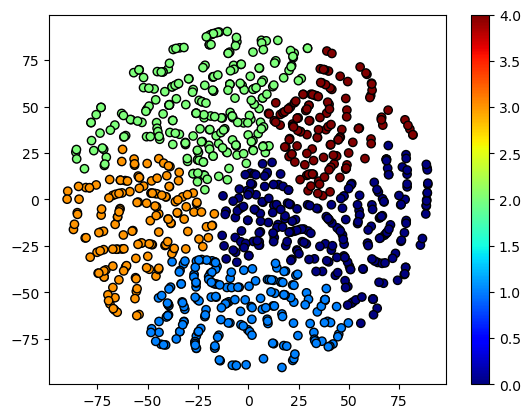

In [36]:
plt.scatter(x_tsne_clf[:1000,0], x_tsne_clf[:1000,1], edgecolor='black', c=clst2.labels_, cmap='jet')
plt.colorbar()

In [37]:
set(clst2.labels_)

{0, 1, 2, 3, 4}

In [38]:
clst.labels_.shape

(32561,)

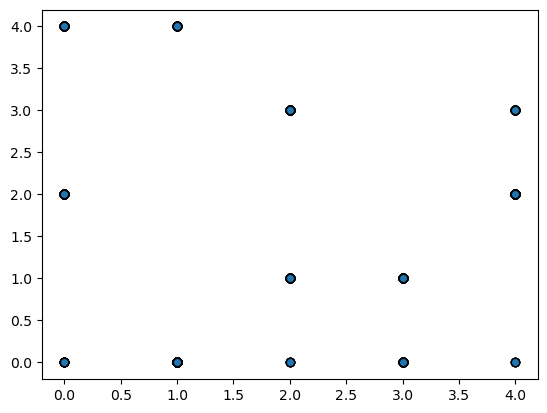

In [39]:
plt.scatter(clst.labels_[:1000], clst2.labels_, edgecolor='black',  cmap='jet')

In [40]:
df_clust=ds_clf_bin_enc.iloc[:1000,:]#.copy()
df_clust['clust']=clst2.labels_
df_clust['target']=y_clf[:1000]
df_clust.groupby(['clust','target']).mean().T

C:\Users\isa_a\AppData\Local\Temp\ipykernel_26676\3233482584.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clust['clust']=clst2.labels_
C:\Users\isa_a\AppData\Local\Temp\ipykernel_26676\3233482584.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clust['target']=y_clf[:1000]


clust                         0                             1                 \
target                        0              1              0              1   
age                   38.182320      43.680000      35.742138      44.333333   
workclass_0            0.000000       0.000000       0.000000       0.000000   
workclass_1            0.187845       0.106667       0.188679       0.194444   
workclass_2            0.928177       0.853333       0.855346       0.805556   
workclass_3            0.767956       0.906667       0.849057       0.722222   
fnlwgt            173459.491713  174775.600000  243745.295597  259864.194444   
education_0            0.016575       0.000000       0.006289       0.027778   
education_1            0.143646       0.133333       0.125786       0.222222   
education_2            0.397790       0.253333       0.371069       0.222222   
education_3            0.651934       0.413333       0.735849       0.555556   
education_4            0.270718       0.533333       0.295597       0.305556   
education-num          9.535912      11.866667       9.465409      11.277778   
marital-status_0       0.088398       0.013333       0.132075       0.055556   
marital-status_1       0.552486       0.906667       0.459119       1.000000   
marital-status_2       0.674033       0.133333       0.672956       0.250000   
occupation_0           0.298343       0.200000       0.308176       0.277778   
occupation_1           0.613260       0.480000       0.534591       0.555556   
occupation_2           0.453039       0.560000       0.503145       0.500000   
occupation_3           0.541436       0.253333       0.515723       0.444444   
relationship_0         0.364641       0.040000       0.358491       0.194444   
relationship_1         0.348066       0.866667       0.308176       0.750000   
relationship_2         0.469613       0.226667       0.528302       0.333333   
race_0                 0.038674       0.000000       0.012579       0.000000   
race_1                 0.138122       0.026667       0.194969       0.250000   
race_2                 0.856354       1.000000       0.811321       0.861111   
sex_0                  0.408840       0.133333       0.314465       0.250000   
sex_1                  0.591160       0.866667       0.685535       0.750000   
capital-gain         276.707182    3236.346667     268.867925    2375.055556   
capital-loss          34.469613     123.093333      43.572327     204.722222   
hours-per-week        36.491713      44.333333      38.396226      44.500000   
native-country_0       0.000000       0.000000       0.000000       0.000000   
native-country_1       0.016575       0.013333       0.031447       0.083333   
native-country_2       0.027624       0.040000       0.031447       0.055556   
native-country_3       0.071823       0.053333       0.069182       0.111111   
native-country_4       0.044199       0.053333       0.069182       0.111111   
native-country_5       0.950276       0.946667       0.911950       0.888889   

clust                         2                             3                 \
target                        0              1              0              1   
age                   35.195876      43.339623      35.846154      45.206897   
workclass_0            0.000000       0.000000       0.000000       0.000000   
workclass_1            0.164948       0.264151       0.169231       0.275862   
workclass_2            0.876289       0.849057       0.861538       0.827586   
workclass_3            0.865979       0.867925       0.876923       0.758621   
fnlwgt            193107.639175  176895.226415  215122.153846  238715.931034   
education_0            0.015464       0.000000       0.000000       0.000000   
education_1            0.108247       0.207547       0.115385       0.172414   
education_2            0.350515       0.358491       0.446154       0.448276   
education_3            0.747423       0.566038       0.738462       0.551724   

## Dendrogram

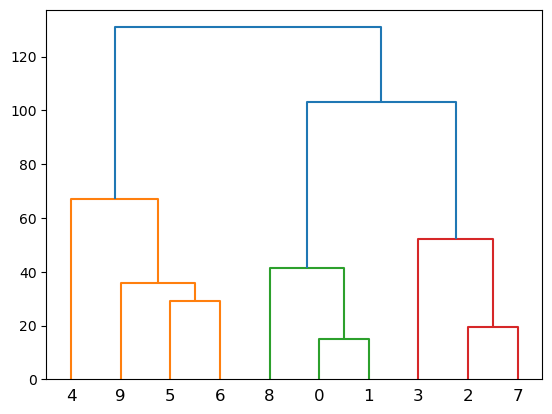

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

x = x_tsne_clf[:10,0]#[4, 5, 10, 4, 3, 11, 14 , 6, 10, 12]
y = x_tsne_clf[:10,1]#[21, 19, 24, 17, 16, 25, 24, 22, 21, 21]

data = list(zip(x, y))

linkage_data = linkage(data, method='ward', metric='euclidean')
dendrogram(linkage_data)

plt.show()

# Classification with clustering features

## With clustering features

In [52]:
ds_clst=ds_clf_bin_enc.copy()
ds_clst['clst']=clst2.labels_
be=ce.BinaryEncoder(cols=['clst'])
ds_clst=be.fit_transform(ds_clst)
ds_clst.head()

,age,workclass_0,workclass_1,workclass_2,workclass_3,fnlwgt,education_0,education_1,education_2,education_3,...,hours-per-week,native-country_0,native-country_1,native-country_2,native-country_3,native-country_4,native-country_5,clst_0,clst_1,clst_2
0,39,0,0,0,1,77516,0,0,0,0,...,40,0,0,0,0,0,1,0,0,1
1,50,0,0,1,0,83311,0,0,0,0,...,13,0,0,0,0,0,1,0,0,1
2,38,0,0,1,1,215646,0,0,0,1,...,40,0,0,0,0,0,1,0,1,0
3,53,0,0,1,1,234721,0,0,0,1,...,40,0,0,0,0,0,1,0,1,1
4,28,0,0,1,1,338409,0,0,0,0,...,40,0,0,0,0,1,0,1,0,0


In [53]:
xtr,xtst,ytr,yts=train_test_split(ds_clst, y_clf)

In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
clf=DecisionTreeClassifier()
clf.fit(xtr,ytr)
clf.score(xtst,yts)

0.8150104409777669

## No clustering features

In [55]:
clf=DecisionTreeClassifier()
clf.fit(X_train_c,y_train_c)
clf.score(X_test_c,y_test_c)

0.8059743160245673

# Saving objects to file